# 1.Problem Analysis


The intent to classify whether the patient has breast cancer or not given from the 3500 instances and 150 features.This is a binary classification problem with the labels (0 and 1) where 0 means Benign who are non-cancerous patients and 1 means malignant for patients who have cancer. 
Micro-calcifications are calcium deposits in breasts that appear as a natural process of ageing. Some micros are non cancerous(benign) while some are cancerous(Malignant). It is very important to train and test our model without data leakage because the false positive cases and false negative cases are both harmful when dealing with life threatening diseases. 


In [1]:
# import libraries

import numpy as np
import pandas as pd
import sklearn
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook
%matplotlib inline
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
#load the dataset
data = pd.read_excel("C:/Users/Deepika Chandrababu/Desktop/TAI/dataset/Reduced Features for TAI project.xlsx")


# 2.Data Analysis

In [3]:
data.head()

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030205,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,2,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,2,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0


In [22]:
data.tail()

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
3557,96,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1
3558,96,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1
3559,96,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1
3560,96,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1
3561,96,0.540562,2.317722,0.496575,1.933525,479.796178,393.770701,1347.133758,176.326464,0.912156,...,1.846151,0.994323,2.600714,0.293748,0.419372,1.394285,0.971497,1.223159,162.772856,1


Checking the first five and last five rows of the whole dataset, it is seen that there are more than one rows contributing the records for a single patient. Lets look at the unique values of the "Patient ID " column to know how many patients were there. 

In [23]:
data.shape

(3562, 152)

In [24]:
data["Patient ID"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], dtype=int64)

There are 96 patient records available but the whole dataset has about 3562 rows having each patient details in multiple rows. This is because of the multiple micros occuring for non cancerous and cancerous patients. As seen in the below plot, there are 2000 instances for benign and 1500 instances for malignant with respect the multiple individual micros that occurs for cancer and non cancerous patients. So, the next step to group the data with respect to the "Patient ID" taking the mean of their records. 

C:\Users\Deepika Chandrababu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total Count')

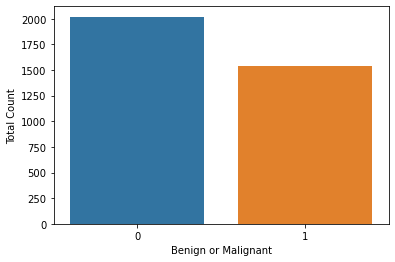

In [11]:
count = sns.countplot(data["Label"])
count.set_xlabel("Benign or Malignant")
count.set_ylabel("Total Count")

In [5]:
data_grouped = data.groupby(["Patient ID"]).mean()


Now the dataset has 96 rows and 151 columns.

In [8]:
data_grouped.shape

(96, 151)

In [12]:
data_grouped.columns

Index(['original_shape_Elongation', 'original_firstorder_Kurtosis',
       'original_firstorder_Skewness', 'wavelet-LHL_glrlm_RunVariance',
       'wavelet2-LHL_gldm_LargeDependenceEmphasis',
       'wavelet2-LLH_gldm_LargeDependenceEmphasis',
       'wavelet-LHL_gldm_LargeDependenceEmphasis',
       'wavelet2-LHL_gldm_DependenceVariance',
       'wavelet2-LHL_glrlm_RunVariance', 'wavelet-LHL_glrlm_LongRunEmphasis',
       ...
       'wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis',
       'wavelet2-HHH_firstorder_RootMeanSquared',
       'wavelet2-LLH_firstorder_Kurtosis', 'wavelet-HHL_glcm_Imc2',
       'wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation',
       'original_shape_SphericalDisproportion', 'wavelet2-HHL_glcm_Idmn',
       'wavelet2-LHH_firstorder_RootMeanSquared',
       'wavelet2-HLL_firstorder_Maximum', 'Label'],
      dtype='object', length=151)

# 3.Splitting the data train test set

This is done earlier to keep the original test set and to avoid overfitting. 20% of the data is separated as test set to check the reliability of our model.

In [14]:
Train, Test = train_test_split(data_grouped, test_size=0.20) 

Train_columns = Train.iloc[:, Train.columns != "Label"]
Test_columns = Test.iloc[:, Test.columns != "Label"]

Train_label = Train["Label"]
Test_label = Test["Label"]

In [6]:
print("Train size:", Train.shape)
print("Train label:", Train_label.shape)
print("Test size:", Test.shape)
print("Test label:", Test_label.shape)

Train size: (76, 151)
Train label: (76,)
Test size: (20, 151)
Test label: (20,)


# 4.Exploratory data analysis 

## 4.1.Distribution of the target variable

As seen in the below plot, the data is imbalanced where label = 0 means Benign patients who do not have cancer are higher than label = 1 means Malignant Patients who has cancer.

C:\Users\Deepika Chandrababu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total Count')

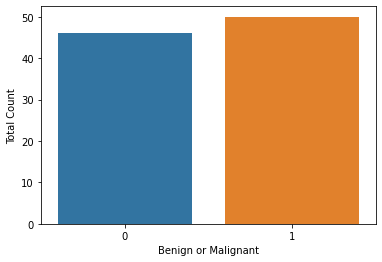

In [9]:
count = sns.countplot(data_grouped["Label"])
count.set_xlabel("Benign or Malignant")
count.set_ylabel("Total Count")

## 4.2.Checking for missing values

There are no missing values and duplications found in the data

In [31]:
Train.isna().sum()

original_shape_Elongation                    0
original_firstorder_Kurtosis                 0
original_firstorder_Skewness                 0
wavelet-LHL_glrlm_RunVariance                0
wavelet2-LHL_gldm_LargeDependenceEmphasis    0
                                            ..
original_shape_SphericalDisproportion        0
wavelet2-HHL_glcm_Idmn                       0
wavelet2-LHH_firstorder_RootMeanSquared      0
wavelet2-HLL_firstorder_Maximum              0
Label                                        0
Length: 151, dtype: int64

In [32]:
sum(Train.duplicated())

0

# 4.3.Univariate Analysis

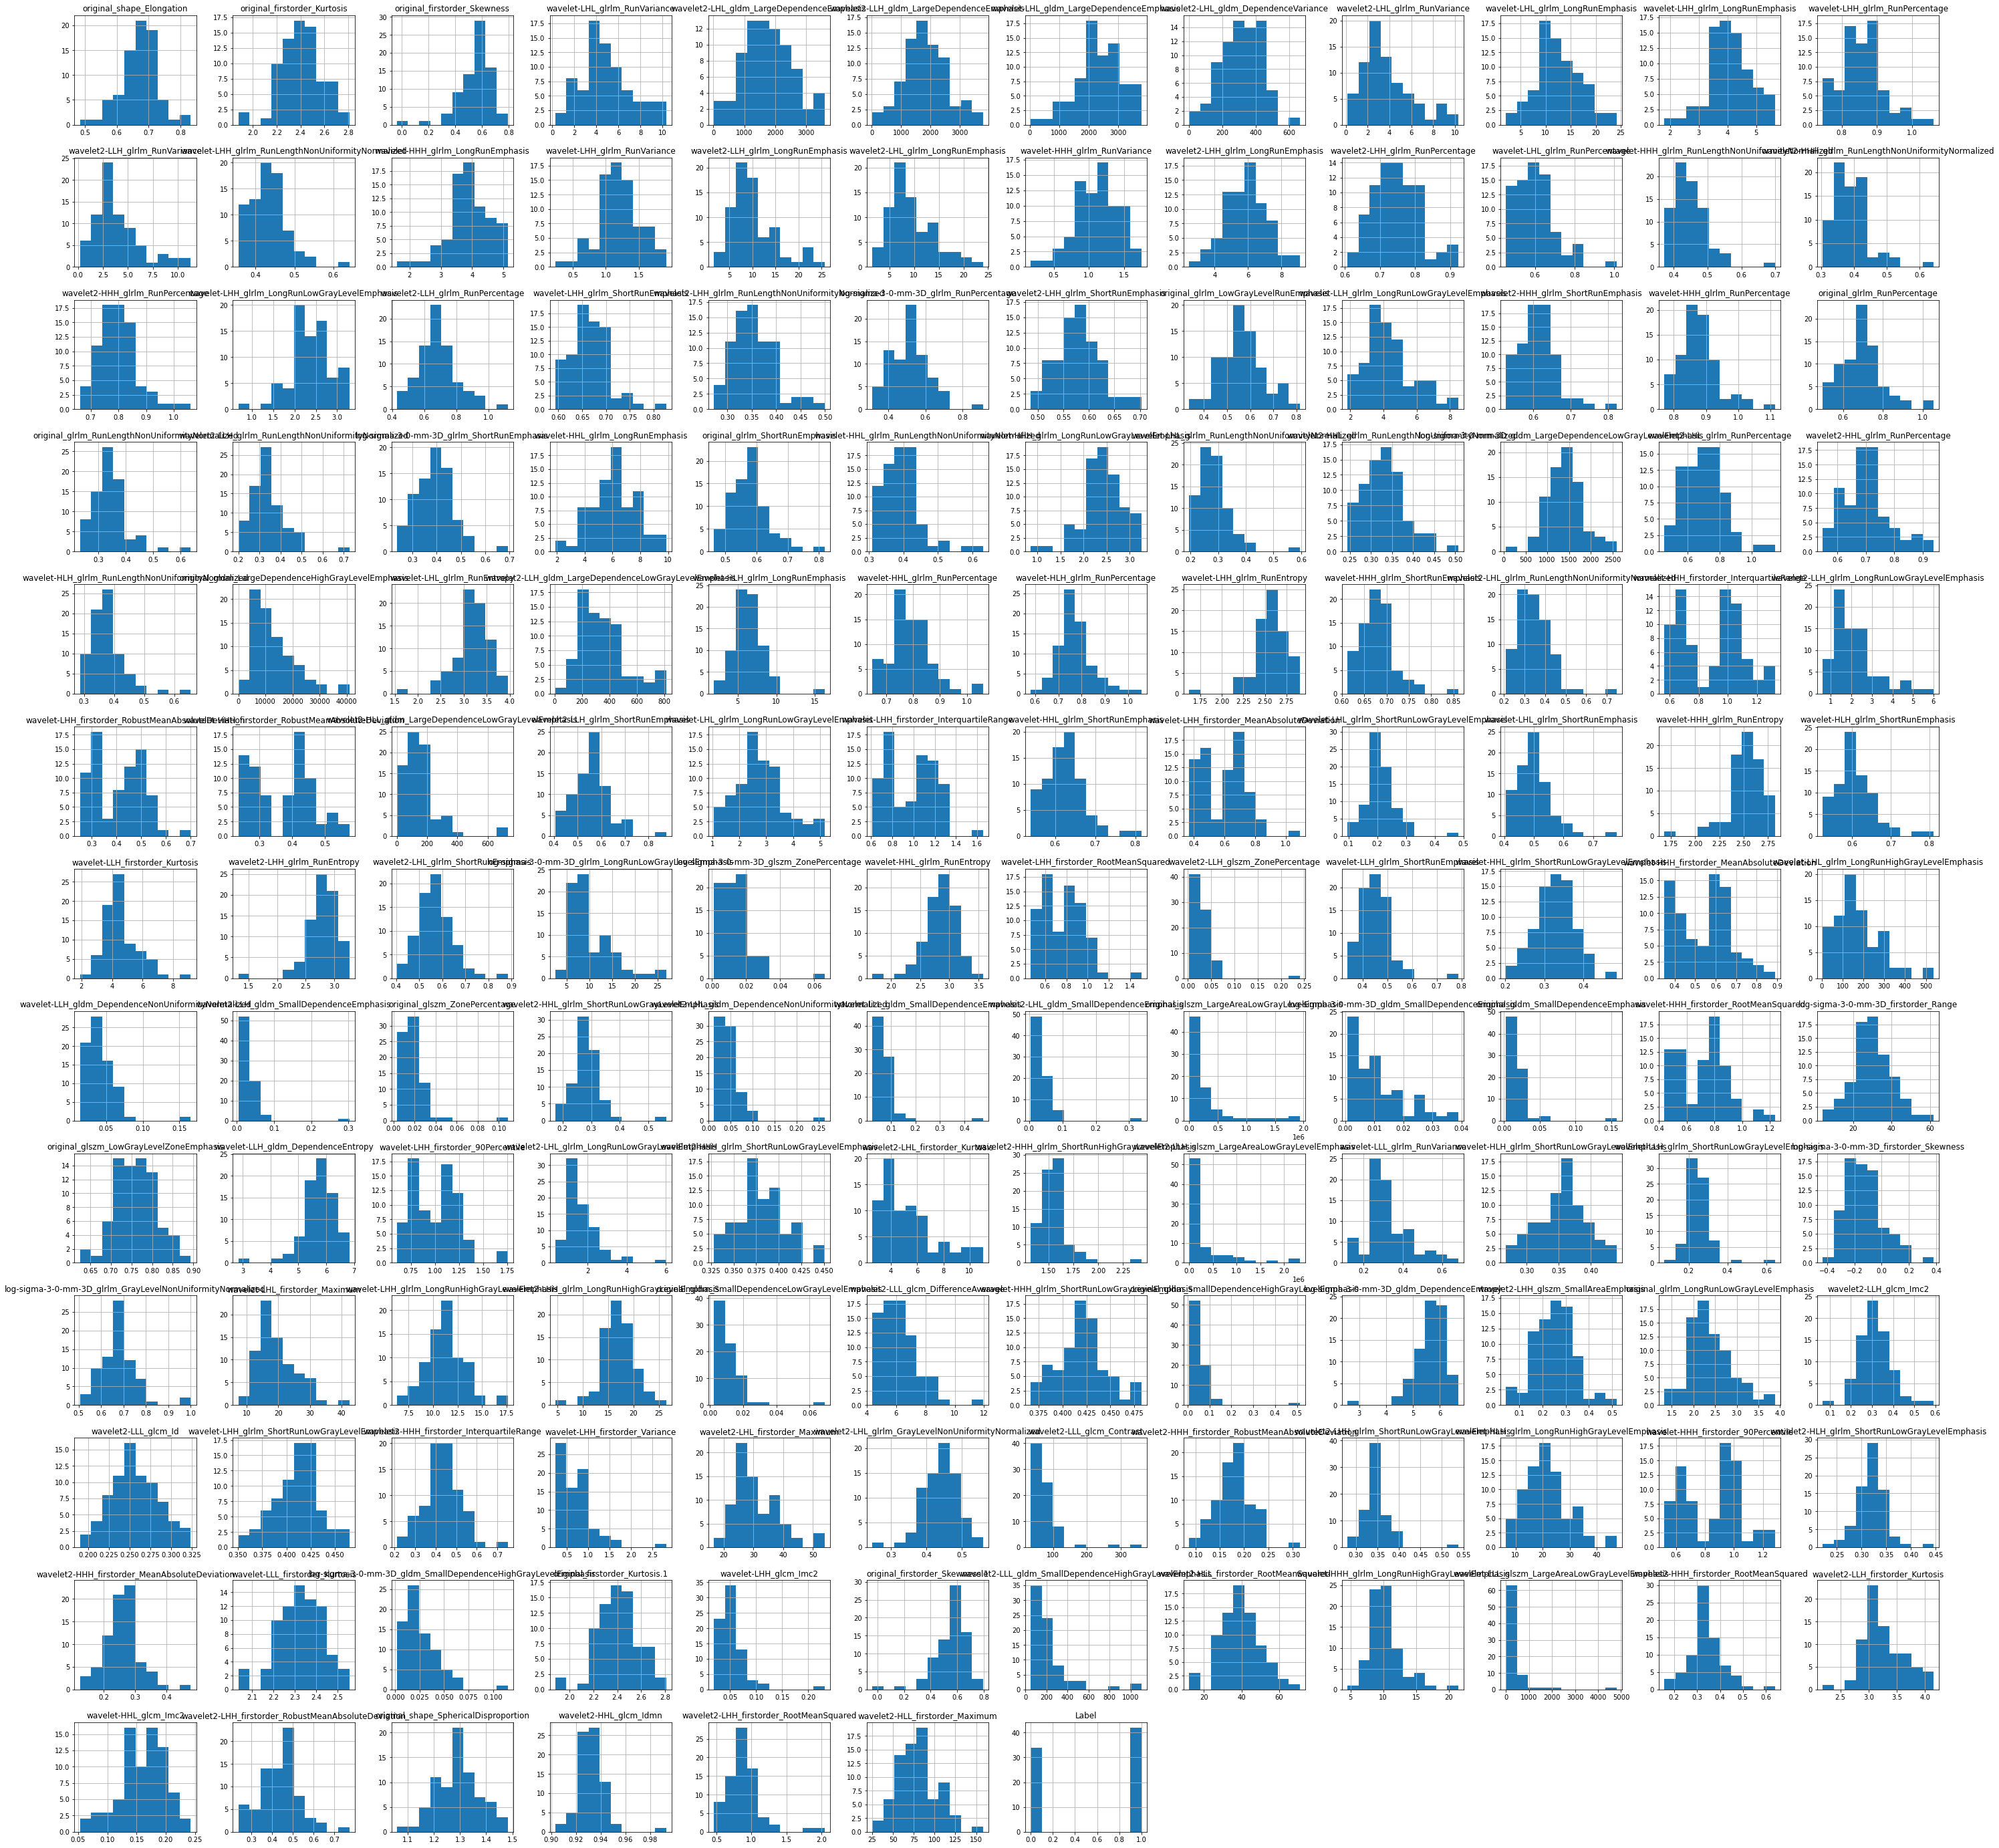

In [46]:
Train.hist(figsize = (50,50)) 
plt.show()

The bars of histogram means the values are 0 if the bars are on the left side and for those bars on the right side have high values and the center bars are average. As seen the bars in most of the columns fall in the left side which are not useful. But most of them have high values and mean values. Hence we go through a feature importance section to know the most important features and get rid of the least valuable features to avoid bias.

# 5.Feature selection

Extremely randomized Tree Classifier (Extra trees) fits a number of randomized decision trees and chooses a best one out of all the subset of braches in the tree. Extra trees adds random trees but improves the predictive accuracy and control over-fitting.

In [7]:
model = ExtraTreesClassifier()
model.fit(Train_columns, Train_label)
print(model.feature_importances_)

[0.00955143 0.01176886 0.01479821 0.00465137 0.00387986 0.00303759
 0.00664825 0.00465736 0.00294974 0.01244104 0.00349852 0.00567945
 0.00271182 0.00327989 0.00326607 0.00445598 0.00428519 0.00221359
 0.00571558 0.0052076  0.00529265 0.00537919 0.00188934 0.00283004
 0.008047   0.00516535 0.00515878 0.00703791 0.00437206 0.00494822
 0.00406596 0.00659304 0.00469662 0.00513517 0.00358676 0.0034166
 0.00500116 0.00575985 0.00467505 0.00544471 0.00231263 0.00336478
 0.00586319 0.00475525 0.00333875 0.00631579 0.00474805 0.00477329
 0.00336479 0.00538044 0.00425057 0.0064847  0.00444731 0.00677405
 0.00861028 0.00416136 0.0028557  0.00524338 0.02565148 0.0038229
 0.02509032 0.01926111 0.00213717 0.00712457 0.00788517 0.02376138
 0.00497753 0.02265589 0.00619441 0.01282759 0.00252596 0.00761189
 0.00740725 0.00503904 0.00362176 0.00478906 0.0037294  0.00527499
 0.02444716 0.00601044 0.0029943  0.00627685 0.01549193 0.00980873
 0.00652095 0.00801267 0.0054343  0.00426921 0.00711049 0.005513

All the features are ordered from highest to lowest with respect to the score of their imporatance.  The following code gives the column numbers with their importance score. Using which we can select the top features to train our model and disgard the features that are less important.

In [51]:
imp = pd.Series(model.feature_importances_).sort_values(ascending = False)
imp

58     0.030278
65     0.024249
67     0.020619
82     0.017810
98     0.016396
         ...   
129    0.002077
87     0.002036
8      0.001886
102    0.001741
84     0.001737
Length: 150, dtype: float64

Text(0, 0.5, 'Importance score')

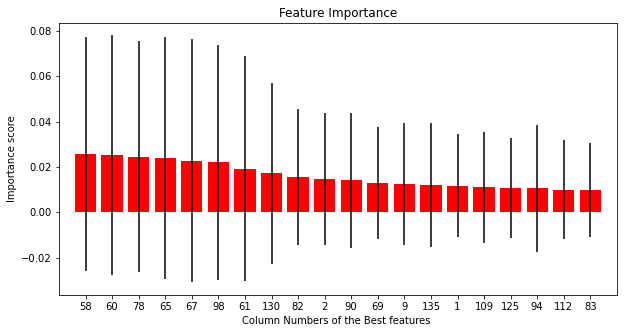

In [19]:
ax = skplt.estimators.plot_feature_importances(model, title="Feature Importance",
                                         order="descending", figsize=(10,5))
ax.set_xlabel("Column Numbers of the Best features")
ax.set_ylabel("Importance score")

Extracting the top 50 features

In [20]:
topfifty_features = imp[0:49]
topfifty_features.keys()

Int64Index([ 58,  60,  78,  65,  67,  98,  61, 130,  82,   2,  90,  69,   9,
            135,   1, 109, 125,  94, 112,  83,   0, 146, 137, 136,  54,  24,
             85,  64, 120, 133,  71, 124, 127,  72,  92,  97, 138,  63, 149,
             88, 123,  27, 122, 145,  96, 101,  53, 132, 141],
           dtype='int64')

In [15]:
topfiftytrain = Train_columns.iloc[:,[ 58,  60,  78,  65,  67,  98,  61, 130,  82,   2,  90,  69,   9,
            135,   1, 109, 125,  94, 112,  83,   0, 146, 137, 136,  54,  24,
             85,  64, 120, 133,  71, 124, 127,  72,  92,  97, 138,  63, 149,
             88, 123,  27, 122, 145,  96, 101,  53, 132, 141]]
topfiftytest = Test_columns.iloc[:,[ 58,  60,  78,  65,  67,  98,  61, 130,  82,   2,  90,  69,   9,
            135,   1, 109, 125,  94, 112,  83,   0, 146, 137, 136,  54,  24,
             85,  64, 120, 133,  71, 124, 127,  72,  92,  97, 138,  63, 149,
             88, 123,  27, 122, 145,  96, 101,  53, 132, 141]]

Out of 151 features, the best 50 features were selected to train the model. The feature selection was done on the test set to keep them in the same order.

## Learning Curve 

Random forest classier, the model suffers from high variance since the training score is higher than the validation score, it overfits on the train dataset but the validation curve appears to converge at the end with the increase in sample size

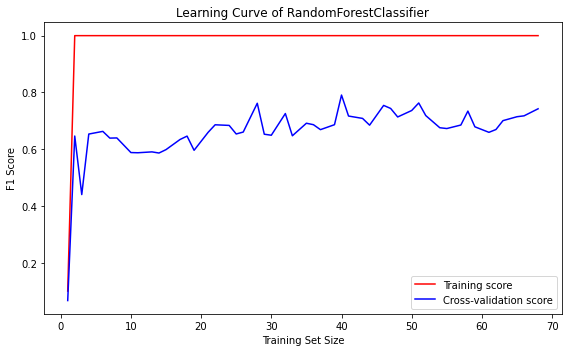

In [12]:
X=topfiftytrain
y=Train_label
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(8,5))
plt.plot(train_sizes, train_mean,  color='r', markersize=5, label="Training score")
plt.plot(train_sizes, test_mean, color='b', markersize=5, label="Cross-validation score")
plt.title("Learning Curve of RandomForestClassifier")
plt.xlabel("Training Set Size"), plt.ylabel("F1 Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Increasing the sample size to the top 75 features did not make the model better. So I used top 50 features to train the model.

In [ ]:
topsevenfeatures = Train_columns.iloc[:,[ 65,  67,  60,  58,  61,  78, 133, 130, 135,   2,   1,  98,   9,
             45,  94,  82, 146, 137,  27,  30, 142,  62, 119,  71,  64, 107,
              7,  85,   0,   6,  90,  72,  68,   3,  76, 120, 149,  21, 110,
             44, 138,  42,  95, 113, 148, 144,  32,  51,  43,  75, 112,  69,
             28,  80,  37,  93,  38, 111,  63,  66, 122,  20, 143, 126, 134,
             73, 117,  17,  12,  59,  83,  88,  86,  15]]

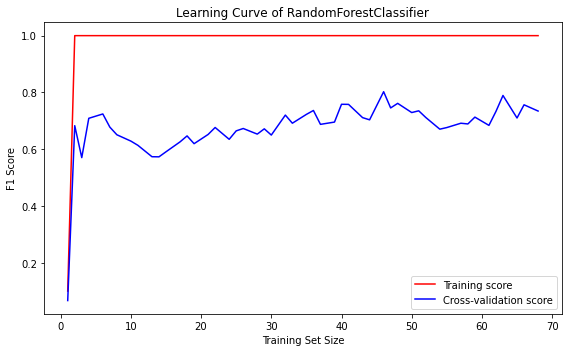

In [25]:
X=topsevenfeatures
y=Train_label
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(8,5))
plt.plot(train_sizes, train_mean,  color='r', markersize=5, label="Training score")
plt.plot(train_sizes, test_mean, color='b', markersize=5, label="Cross-validation score")
plt.title("Learning Curve of RandomForestClassifier")
plt.xlabel("Training Set Size"), plt.ylabel("F1 Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 6.Model Training

## Random Forest Classifier

### Fitting the random forest classifer on a validation set, 

In [23]:
X_val, X_test, y_val, y_test = train_test_split(topfiftytrain, Train_label, test_size=0.25)
rf = RandomForestClassifier()
rf.fit(X_val, y_val)
y_pred_rf = rf.predict(X_test)
print("Accuracy of validation set of 50 features:", accuracy_score(y_test, y_pred_rf))
print("Loss loss of validation set of 50 features:",sklearn.metrics.log_loss(y_test, y_pred_rf))
print("F1 Measure of validation set of 50 features:",f1_score(y_test, y_pred_rf,average= "macro"))

Accuracy of validation set of 50 features: 0.6842105263157895
Loss loss of validation set of 50 features: 10.907108271671298
F1 Measure of validation set of 50 features: 0.6833333333333333


### Predicting on the actual test data

Accuracy works by using the formula : **accuracy = (tp + tn) / (tp + fp + fn + tn)** which measures the observations with respect to the false positive and false negative rates. 

In this binary classification where we deal with cancerous and non cancerous classification, it is very crucial to avoid false positive and false negative cases. The f1 score treats the FP and FN equally.   

Hence, f1 score is calculated with the formula : **f1 score = tp / tp + 1/2 (fp+fn)**. The model gives an accuracy of 0.8  and a f1 score 0.8  close to 1, proving the model is not overfitting. Also, the log loss score decreased from that of the validation set.

In [24]:
test_pred_rf = rf.predict(topfiftytest)
print("Accuracy of 50 features on test data:", accuracy_score(Test_label, test_pred_rf))
print("Loss loss of 50 features on test data:",sklearn.metrics.log_loss(Test_label, test_pred_rf))
print("F1 Measure of 50 features on test data:",f1_score(Test_label, test_pred_rf,average= "macro"))

Accuracy of 50 features on test data: 0.8
Loss loss of 50 features on test data: 6.907835238725156
F1 Measure of 50 features on test data: 0.797979797979798


# Confusion Matrix

The confusion matrix below shows the values corresponding to the below table

| True Positive (TP) - 0.73 | False Negative (FN) - 0.27 |
| --- | --- | 
| False Positive (FP) - 0.33 | True Negative (TN) - 0.67 |

The plot proves that most of the classification are true positive and true negative but there are some false negative and false positive rates which the model should minimize.



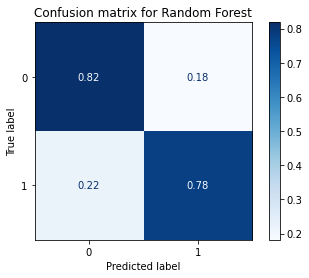

In [25]:
rf = rf.fit(topfiftytrain, Train_label)
matrix = plot_confusion_matrix(rf, topfiftytest, Test_label, normalize = 'true',cmap=plt.cm.Blues)
plt.title('Confusion matrix for Random Forest')
plt.show(matrix)
plt.show()

# ROC Curve

As seen in the below plot, the graph shows the tradeoff between false positive rate(FPR) on the x axis and true positive rate(TPR) on the y axis. The baseline is the average(0.5) of TPR and FPR, if the predictions are random it indicated a straight line. The area below the dashed line(baseline) will show more false positive rate meaning the worst performance of a model. But for our model(binary classification), the model predicts the probability of the occurence of both the classes. The ROC curve for both classes (0 and 1) appear above the baseline with an area of 0.83 proving most of the classification are true positives. 

C:\Users\Deepika Chandrababu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC of Random Forest Classifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

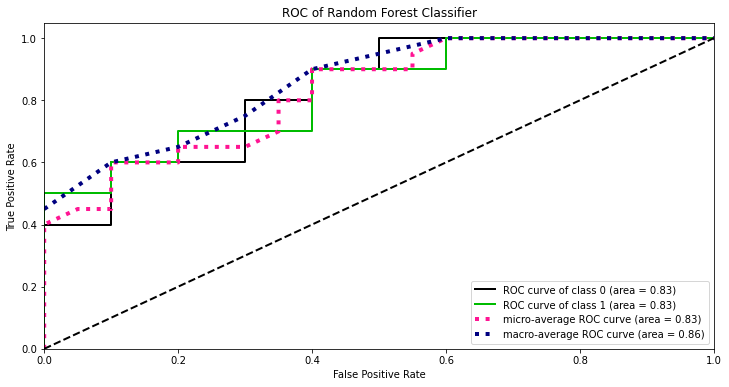

In [34]:
rf_probas = rf.predict_proba((topfiftytest))
skplt.metrics.plot_roc_curve(Test_label, rf_probas,title = "ROC of Random Forest Classifier", figsize=(12,6))

# Questions

# Task 1

##  How well can you classify individual micros assuming all micros per subject have the same  label?

As multiple rows had infomation about a single patient and their labels were identical, I grouped all individual micros per subject having the same label. The f1 score of 0.8 on the test data shows that 80% of the times the model was able to classify the benign and malignant micros correctly.

# Task 2
## How well can you classify whether  a subject  has cancer  based on your classification of the multiple micros per subject?

It is a good indication to note that on the test data the f1 score is almost 0.8 which isclose to 1 after training a random forest classifier which proves that the model had performed well on the unseen patient records and classified their labels correctly with 80% correctness.


# References

https://machinelearningmastery.com/feature-selection-machine-learning-python/

https://coderzcolumn.com/tutorials/machine-learning/scikit-plot-visualizing-machine-learning-algorithm-results-and-performance#3.1-Confusion-Matrix-

https://scikit-plot.readthedocs.io/en/stable/metrics.html

https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

https://medium.com/analytics-vidhya/different-metrics-to-evaluate-the-performance-of-a-machine-learning-model-90acec9e8726

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/